<a href="https://colab.research.google.com/github/gudals6676/Deep_Learning/blob/main/03_keras_%EB%A7%9B%EB%B3%B4%EA%B8%B0(Iris%ED%92%88%EC%A2%85_%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- Iris 데이터를 바탕으로 어떤 품종인지 예측해보자잇!
- 신경망을 활용하여 다중 분류 문제를 해결해보자!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
X = data.data
y = data.target

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.3,random_state = 3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


- 정답데이터 원핫인코딩

In [ ]:
# 케라스에서 지원하는 원핫인코딩 명령
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_one_hot = to_categorical(y_train) # pd.get_dummies(y_train)
y_test_one_hot = to_categorical(y_test)  
#y_train1 = pd.get_dummies(y_train)
#y_test1 = pd.get_dummies(y_test)

In [ ]:
X_train.shape, y_train_one_hot.shape

((105, 4), (105, 3))

In [ ]:
y_train_one_hot

- 1. 신경망 구조 설계
- 2. 학습/평가 방법 설정
- 3. 학습 및 시각화
- 4. 모델 평가

In [ ]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential     # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense   # 신경망의 층을 구성

In [ ]:
# 1. 신경망 구조 설계
md = Sequential()

# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation : 활성화 함수를 설정(들어온 자극(데이터)에 대한 응답여부를 결정하는 함수)
md.add(Dense(20, input_dim= 4, activation= "sigmoid"))

# 중간층
md.add(Dense(40, activation="sigmoid"))  # 하나의 층
md.add(Dense(10, activation="sigmoid"))  # 하나의 층

# 출력층
# 출력층은 회귀의 활성화함수(linear함수, 활성화 함수 생략가능)
# 2진 분류의 활성화함수(sigmoid)
md.add(Dense(3, activation="softmax"))

md.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 20)                100       
_________________________________________________________________
dense_53 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_54 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_55 (Dense)             (None, 3)                 33        
Total params: 1,383
Trainable params: 1,383
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2.학습/평가 방법 설정
# binary_crossentropy : 2진 분류에 사용하는 손실함수(비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하는 방식
md.compile(loss="categorical_crossentropy",
           optimizer = "Adam",          #최적화함수 : 확률적 경사하강법 사용  ,SGD
           metrics=["acc"]             #metrics : 평가 방법을 설정(분류 문제이기 때문에 정확도(acc)를 확인)
           )

In [ ]:
h = md.fit(X_train, y_train_one_hot, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2839 - acc: 0.3429
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.2476 - acc: 0.3429
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.2193 - acc: 0.3429
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1967 - acc: 0.3429
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1788 - acc: 0.3524
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1581 - acc: 0.3429
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1453 - acc: 0.3429
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1334 - acc: 0.3429
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1214 - acc: 0.3429
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1162 - acc: 0.3429
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1077 

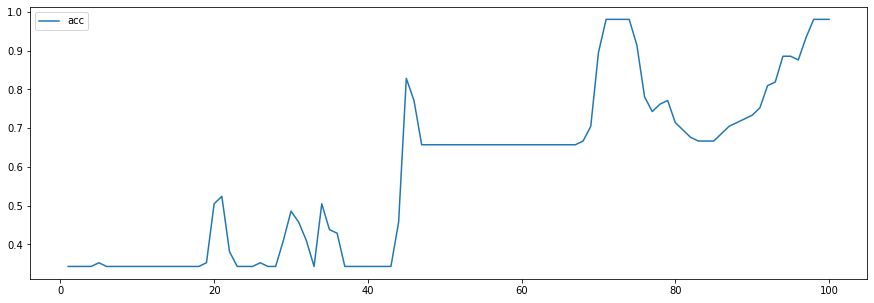

In [ ]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 101, 1),
         h.history['acc'],
         label='acc'
         )

plt.legend()
plt.show()

In [ ]:
# 모델 평가
md.evaluate(X_test, y_test_one_hot)

2/2 [==============================] - 0s 6ms/step - loss: 0.5618 - acc: 0.9556


[0.5618499517440796, 0.9555555582046509]

### 1. 회귀
- loss : mse(평균제곱오차)
- 출력층 뉴런 개수 : 1
- 출력층 활성화 함수 : linear(항등함수) -> 디폴트 값

### 2. 2진 분류
- loss : binary_crossentropy
- 출력층 뉴런 개수 : 1
- 출력층 활성화 함수 : sigmoid

### 3. 다중 분류
- loss : categorical_crossentropy
- 출력층 뉴런 개수 : 정답 레이블의 개수
- 출력층 활성화 함수 : softmax